In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [1]:
import keras
import os
import numpy as np
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [51]:
target_height = 32
target_width  = 32
target_channel = 3

In [52]:
data_version_number = '0_1'

In [53]:
TRAIN_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/train_' + data_version_number + '/'
VALIDATION_PATH = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/validation_' + data_version_number + '/'
TEST_PATH  = 'C:/Users/KaiPin Liao/Documents/kaggle_whales/data/test_' + data_version_number + '/'

In [63]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(target_height, target_width, target_channel)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [64]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

history = keras.callbacks.History()

In [65]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

validation_generator = test_datagen.flow_from_directory(VALIDATION_PATH, 
                                                    target_size = (target_height, target_width)
#                                                     color_mode = 'grayscale'
                                                   )

Found 342 images belonging to 10 classes.
Found 114 images belonging to 10 classes.


In [66]:
history = model.fit_generator(train_generator, 
                              validation_data = validation_generator,
                              epochs = 100,
                              callbacks=[history]
                             )

Epoch 1/100
11/11 [==============================] - ETA: 9s - loss: 6.2682 - acc: 0.031 - ETA: 4s - loss: 6.2182 - acc: 0.078 - ETA: 2s - loss: 6.7366 - acc: 0.104 - ETA: 2s - loss: 6.4895 - acc: 0.109 - ETA: 1s - loss: 6.8210 - acc: 0.106 - ETA: 1s - loss: 6.6057 - acc: 0.093 - ETA: 1s - loss: 6.4493 - acc: 0.102 - ETA: 0s - loss: 6.2814 - acc: 0.101 - ETA: 0s - loss: 6.2782 - acc: 0.100 - ETA: 0s - loss: 6.2797 - acc: 0.096 - 4s 377ms/step - loss: 6.3426 - acc: 0.0907 - val_loss: 4.5373 - val_acc: 0.1228
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 5.9708 - acc: 0.156 - ETA: 0s - loss: 6.1392 - acc: 0.109 - ETA: 0s - loss: 5.4137 - acc: 0.145 - ETA: 0s - loss: 5.4754 - acc: 0.125 - ETA: 0s - loss: 5.4190 - acc: 0.125 - ETA: 0s - loss: 5.2668 - acc: 0.125 - ETA: 0s - loss: 5.1855 - acc: 0.138 - ETA: 0s - loss: 5.1020 - acc: 0.136 - ETA: 0s - loss: 5.0422 - acc: 0.121 - ETA: 0s - loss: 4.9785 - acc: 0.112 - 3s 239ms/step - loss: 4.9477 - acc: 0.1025 - val_loss:

11/11 [==============================] - ETA: 0s - loss: 2.0739 - acc: 0.281 - ETA: 0s - loss: 1.9890 - acc: 0.281 - ETA: 0s - loss: 2.1376 - acc: 0.270 - ETA: 0s - loss: 2.1701 - acc: 0.265 - ETA: 0s - loss: 2.1758 - acc: 0.285 - ETA: 0s - loss: 2.1494 - acc: 0.284 - ETA: 0s - loss: 2.1364 - acc: 0.301 - ETA: 0s - loss: 2.1136 - acc: 0.311 - ETA: 0s - loss: 2.1099 - acc: 0.297 - ETA: 0s - loss: 2.0814 - acc: 0.292 - 3s 313ms/step - loss: 2.0611 - acc: 0.2914 - val_loss: 1.9816 - val_acc: 0.2105
Epoch 18/100
11/11 [==============================] - ETA: 0s - loss: 1.9940 - acc: 0.156 - ETA: 0s - loss: 1.9838 - acc: 0.234 - ETA: 0s - loss: 2.0076 - acc: 0.281 - ETA: 0s - loss: 1.9614 - acc: 0.296 - ETA: 0s - loss: 1.9126 - acc: 0.293 - ETA: 0s - loss: 1.9195 - acc: 0.297 - ETA: 0s - loss: 1.9034 - acc: 0.295 - ETA: 0s - loss: 1.9045 - acc: 0.289 - ETA: 0s - loss: 1.9343 - acc: 0.281 - ETA: 0s - loss: 1.9260 - acc: 0.278 - 4s 321ms/step - loss: 1.9292 - acc: 0.2646 - val_loss: 1.9944 - v

Epoch 33/100
11/11 [==============================] - ETA: 0s - loss: 1.9926 - acc: 0.406 - ETA: 0s - loss: 1.8764 - acc: 0.484 - ETA: 0s - loss: 1.6813 - acc: 0.479 - ETA: 0s - loss: 1.6308 - acc: 0.461 - ETA: 0s - loss: 1.5681 - acc: 0.469 - ETA: 0s - loss: 1.5640 - acc: 0.458 - ETA: 0s - loss: 1.5582 - acc: 0.451 - ETA: 0s - loss: 1.5280 - acc: 0.457 - ETA: 0s - loss: 1.4985 - acc: 0.465 - ETA: 0s - loss: 1.4741 - acc: 0.472 - 3s 311ms/step - loss: 1.4606 - acc: 0.4606 - val_loss: 1.7315 - val_acc: 0.4211
Epoch 34/100
11/11 [==============================] - ETA: 0s - loss: 1.0861 - acc: 0.687 - ETA: 0s - loss: 1.1386 - acc: 0.593 - ETA: 0s - loss: 1.1322 - acc: 0.585 - ETA: 0s - loss: 1.1726 - acc: 0.600 - ETA: 0s - loss: 1.1950 - acc: 0.599 - ETA: 0s - loss: 1.1923 - acc: 0.602 - ETA: 0s - loss: 1.2095 - acc: 0.601 - ETA: 0s - loss: 1.2274 - acc: 0.579 - ETA: 0s - loss: 1.2132 - acc: 0.584 - 3s 275ms/step - loss: 1.2280 - acc: 0.5655 - val_loss: 1.6155 - val_acc: 0.4561
Epoch 35/1

11/11 [==============================] - ETA: 0s - loss: 1.0600 - acc: 0.863 - ETA: 0s - loss: 0.9325 - acc: 0.822 - ETA: 0s - loss: 0.8807 - acc: 0.770 - ETA: 0s - loss: 0.8524 - acc: 0.766 - ETA: 0s - loss: 0.8290 - acc: 0.763 - ETA: 0s - loss: 0.8392 - acc: 0.757 - ETA: 0s - loss: 0.8257 - acc: 0.752 - ETA: 0s - loss: 0.8083 - acc: 0.745 - ETA: 0s - loss: 0.7851 - acc: 0.755 - 3s 269ms/step - loss: 0.7672 - acc: 0.7515 - val_loss: 1.9888 - val_acc: 0.4561
Epoch 50/100
11/11 [==============================] - ETA: 0s - loss: 0.5983 - acc: 0.750 - ETA: 0s - loss: 0.6474 - acc: 0.718 - ETA: 0s - loss: 0.6461 - acc: 0.697 - ETA: 0s - loss: 0.6245 - acc: 0.718 - ETA: 0s - loss: 0.6455 - acc: 0.731 - ETA: 0s - loss: 0.6126 - acc: 0.760 - ETA: 0s - loss: 0.5979 - acc: 0.772 - ETA: 0s - loss: 0.6106 - acc: 0.773 - ETA: 0s - loss: 0.6086 - acc: 0.774 - ETA: 0s - loss: 0.6030 - acc: 0.774 - 3s 244ms/step - loss: 0.6410 - acc: 0.7663 - val_loss: 2.1907 - val_acc: 0.4737
Epoch 51/100
11/11 [===

11/11 [==============================] - ETA: 0s - loss: 0.6289 - acc: 0.812 - ETA: 0s - loss: 0.5693 - acc: 0.875 - ETA: 0s - loss: 0.4787 - acc: 0.895 - ETA: 0s - loss: 0.4372 - acc: 0.882 - ETA: 0s - loss: 0.3962 - acc: 0.893 - ETA: 0s - loss: 0.3782 - acc: 0.901 - ETA: 0s - loss: 0.3710 - acc: 0.892 - ETA: 0s - loss: 0.3360 - acc: 0.900 - ETA: 0s - loss: 0.3361 - acc: 0.901 - ETA: 0s - loss: 0.3424 - acc: 0.895 - 3s 309ms/step - loss: 0.3996 - acc: 0.8764 - val_loss: 2.9444 - val_acc: 0.5263
Epoch 66/100
11/11 [==============================] - ETA: 0s - loss: 0.7183 - acc: 0.843 - ETA: 0s - loss: 0.4628 - acc: 0.890 - ETA: 0s - loss: 0.3835 - acc: 0.906 - ETA: 0s - loss: 0.3788 - acc: 0.898 - ETA: 0s - loss: 0.3315 - acc: 0.912 - ETA: 0s - loss: 0.3013 - acc: 0.919 - ETA: 0s - loss: 0.3287 - acc: 0.908 - ETA: 0s - loss: 0.3619 - acc: 0.892 - ETA: 0s - loss: 0.3466 - acc: 0.897 - ETA: 0s - loss: 0.3245 - acc: 0.908 - 3s 287ms/step - loss: 0.3136 - acc: 0.9134 - val_loss: 2.4896 - v

11/11 [==============================] - ETA: 0s - loss: 0.5576 - acc: 0.781 - ETA: 0s - loss: 0.4957 - acc: 0.859 - ETA: 0s - loss: 0.5008 - acc: 0.864 - ETA: 0s - loss: 0.4516 - acc: 0.859 - ETA: 0s - loss: 0.4104 - acc: 0.868 - ETA: 0s - loss: 0.4567 - acc: 0.875 - ETA: 0s - loss: 0.4226 - acc: 0.879 - ETA: 0s - loss: 0.3821 - acc: 0.894 - ETA: 0s - loss: 0.3526 - acc: 0.902 - ETA: 0s - loss: 0.3371 - acc: 0.906 - 3s 266ms/step - loss: 0.3229 - acc: 0.9060 - val_loss: 2.5162 - val_acc: 0.5175
Epoch 82/100
11/11 [==============================] - ETA: 0s - loss: 0.1247 - acc: 0.968 - ETA: 0s - loss: 0.1346 - acc: 0.968 - ETA: 0s - loss: 0.1591 - acc: 0.949 - ETA: 0s - loss: 0.1552 - acc: 0.953 - ETA: 0s - loss: 0.1885 - acc: 0.940 - ETA: 0s - loss: 0.2233 - acc: 0.931 - ETA: 0s - loss: 0.2195 - acc: 0.935 - ETA: 0s - loss: 0.2402 - acc: 0.925 - ETA: 0s - loss: 0.2343 - acc: 0.926 - 3s 245ms/step - loss: 0.2349 - acc: 0.9219 - val_loss: 2.7599 - val_acc: 0.5088
Epoch 83/100
11/11 [===

11/11 [==============================] - ETA: 0s - loss: 0.1153 - acc: 0.968 - ETA: 0s - loss: 0.1169 - acc: 0.959 - ETA: 0s - loss: 0.1013 - acc: 0.969 - ETA: 0s - loss: 0.0932 - acc: 0.969 - ETA: 0s - loss: 0.1050 - acc: 0.969 - ETA: 0s - loss: 0.1086 - acc: 0.969 - ETA: 0s - loss: 0.1020 - acc: 0.973 - ETA: 0s - loss: 0.1222 - acc: 0.972 - ETA: 0s - loss: 0.1125 - acc: 0.975 - 3s 314ms/step - loss: 0.1097 - acc: 0.9748 - val_loss: 2.9604 - val_acc: 0.5439
Epoch 98/100
11/11 [==============================] - ETA: 0s - loss: 0.0581 - acc: 1.000 - ETA: 0s - loss: 0.0326 - acc: 1.000 - ETA: 0s - loss: 0.0449 - acc: 0.989 - ETA: 0s - loss: 0.0631 - acc: 0.984 - ETA: 0s - loss: 0.0641 - acc: 0.981 - ETA: 0s - loss: 0.0853 - acc: 0.974 - ETA: 0s - loss: 0.1088 - acc: 0.964 - ETA: 0s - loss: 0.1077 - acc: 0.960 - ETA: 0s - loss: 0.0975 - acc: 0.965 - ETA: 0s - loss: 0.0893 - acc: 0.968 - 3s 273ms/step - loss: 0.0865 - acc: 0.9687 - val_loss: 3.3295 - val_acc: 0.5088
Epoch 99/100
11/11 [===

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


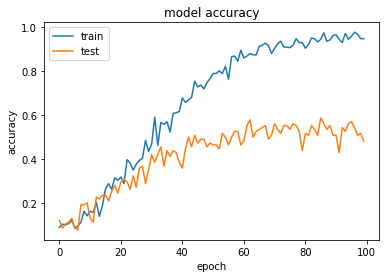

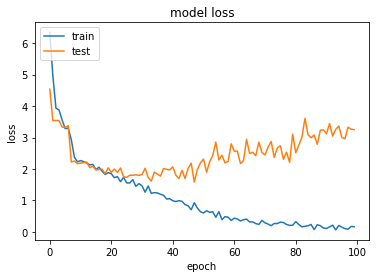

In [67]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.legend(['train'], loc='upper left')
plt.show()

In [68]:
history.history['loss']

[6.344960452520359,
 4.956173263795194,
 3.933430514140436,
 3.8760387576811497,
 3.561008658325463,
 3.283022110922295,
 3.3009142234311466,
 2.928699812693903,
 2.3756288952297635,
 2.227305781771565,
 2.267326890376576,
 2.2352215895178724,
 2.1892691550896184,
 2.1304914881611428,
 2.1476575686917667,
 1.9836010521615457,
 2.0574048318360982,
 1.9284915038716723,
 1.829647633764479,
 1.8844126630247684,
 1.8505802022086248,
 1.7255953215716178,
 1.7579465400405794,
 1.596315848897075,
 1.7356247469695687,
 1.558253226224442,
 1.5562386673096327,
 1.6617154684680246,
 1.4502565930461326,
 1.5374151524047406,
 1.4641965258191203,
 1.2644386974691648,
 1.4600550542797959,
 1.2274341060404192,
 1.2496171178873519,
 1.2396488266381605,
 1.1968946673019587,
 1.1687920253876356,
 1.0459373798983835,
 1.0566502481873272,
 0.9925298621082863,
 0.966262644145921,
 0.995250962282482,
 0.9725373024828949,
 0.8692570663335031,
 0.8315237603689495,
 0.7046689582847016,
 0.9301798964104457,
 0.75